# Анализ параметров установки с дожатием охлаждающего воздуха

## Импорт библиотек

In [41]:
import common

import numpy as np
import scipy as sp
import pandas as pd
import itertools
from IPython.display import Latex
from IPython.display import Math
pd.set_option('max_colwidth',80)

# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10

Populating the interactive namespace from numpy and matplotlib


## Постоянные

In [42]:
data_root = '/home/artem/gowork/src/github.com/Sovianum/cooling-course-project/notebooks/data/'

## Описание

### Ниже представлен анализ характеристик трехвальной установки с дожатием воздуха, охлаждающего турбину высокого давления. Условия следующие:

1. Температура камеры сгорания: 1450 К.
2. Степень повышения давления в КНД и КВД одинаковая.
3. Номинальная мощность 16 МВт.

### Загрузка данных

In [43]:
data = pd.read_json(data_root + '3nsc_simple.json')
data.split_factor = data.split_factor.round(2)
grouped = data.groupby(['sub_compressor_pi', 'split_factor'])

### Проверка на адекватность

#### Проверим, что увеличение степени повышения давления вспомогательного компрессора приводит к уменьшению КПД при том же расходе воздуха через него

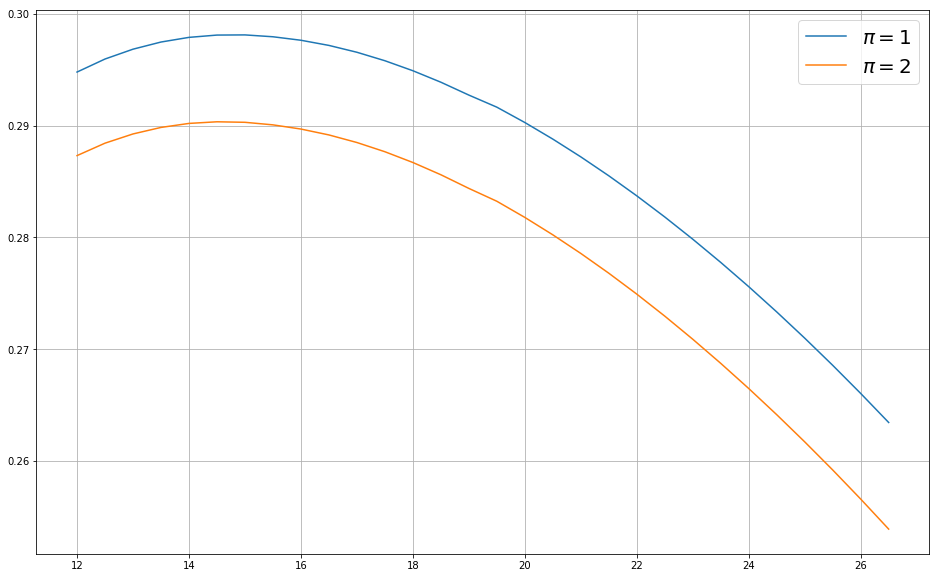

In [44]:
low_pi_data = grouped.get_group((1.01, 0.1))
high_pi_data = grouped.get_group((2, 0.1))

plt.plot(low_pi_data.pi, low_pi_data.efficiency)
plt.plot(high_pi_data.pi, high_pi_data.efficiency)
plt.legend(['$\pi=1$', '$\pi=2$'], fontsize=20, loc='best')
plt.grid()
plt.show()

#### Проверим, что увеличение расхода воздуха через вспомогательный компрессор при неизменной степени повышения давления приводит к снижению КПД

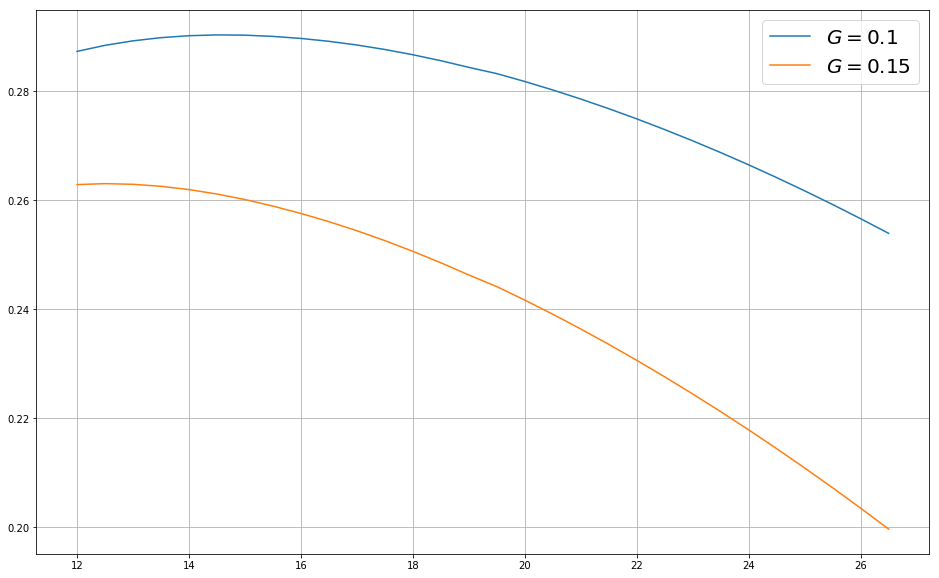

In [45]:
low_mr_data = grouped.get_group((2, 0.1))
high_mr_data = grouped.get_group((2, 0.15))

plt.plot(low_mr_data.pi, low_mr_data.efficiency)
plt.plot(high_mr_data.pi, high_mr_data.efficiency)
plt.legend(['$G=0.1$', '$G=0.15$'], fontsize=20, loc='best')
plt.grid()
plt.show()

### Анализ схемы

#### Сделаем сравнение КПД, предполагая, что дожимание охлаждающего водуха приводит к уменьшению расхода охлаждающего воздуха c 13% до 10%

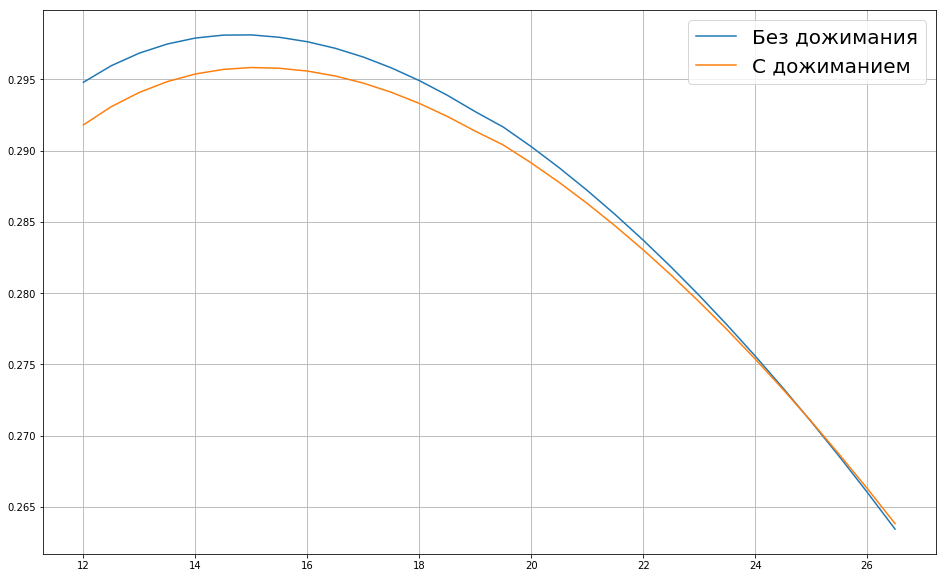

In [46]:
no_sub_data = grouped.get_group((1.01, 0.1)).reset_index()
sub_data = grouped.get_group((2, 0.09)).reset_index()

max_eta = max(no_sub_data.efficiency.max(), sub_data.efficiency.max())

plt.plot(no_sub_data.pi, no_sub_data.efficiency)
plt.plot(sub_data.pi, sub_data.efficiency)
plt.legend(['Без дожимания', 'С дожиманием'], fontsize=20, loc='best')
plt.grid()
plt.show()

#### Максимальные КПД двух вариантов имеют следующие значения

In [47]:
sub_eta_max = sub_data.efficiency.max() * 100
no_sub_eta_max = no_sub_data.efficiency.max() * 100
d_eta = sub_eta_max - no_sub_eta_max
Math(r'''
    \begin{align}
        \eta_{с \ дожиманием} = %.2f \cdot 10^{-2} && 
        \eta_{без \ дожимания} = %.2f  \cdot 10^{-2} && 
        \Delta\eta = %.2f  \cdot 10^{-2}
    \end{align}
    ''' % (sub_eta_max, no_sub_eta_max, sub_eta_max - no_sub_eta_max))

<IPython.core.display.Math object>

In [48]:
data.split_factor.unique()

array([0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15])